# 21M.387 Fundamentals of Music Processing
## Music Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import IPython.display as ipd
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Reading

Chapter 1.0 - 1.4 (pp 1 – 33)

<img src="images/book_cover.png" width=200>

## Introduction

Three types of music representation:
- Score / Sheet Music
- Symbolic - like MIDI
- Audio Recordings

_Actual music_ - composed, performed, imagined, is very a rich construct that is not _fully_ represetned by any of the above.

## Sheet Music

<img src="images/beeth5_piano_opening.png" width=400>

In [2]:
ipd.Audio("audio/beeth5_piano_intro.wav")

<img src="images/beeth5_orch_score.png" width=800>

In [3]:
ipd.Audio("audio/beeth5_orch_21bars.wav")

### Pitches, Scales

__Staff and Clefs__
<img src="images/cleffs.png" width=400>

__Scales__

In Western music: divide the octave into 12 (mostly) even divisions - semitones

- major
<img src="images/c_major.png" width=400>
- minor
<img src="images/c_minor.png" width=400>
- chromatic
<img src="images/chromatic_notes.png" width=800>


<font color='red'>__Whiteboard Example__</font> octave and pitch classes

- The importance of the Octave
- Pitch Classes
- Scientific Pitch Notation
  - C4 = "middle C"
  - A4 = 440Hz

### Rhythm and Durations
Note shape indicates duration
<img src="images/note_durations.png" width=500 >

Rests
<img src="images/rest_durations.png" width=500>

Time signature informs the next larger rhythmic grouping: bars (or measures)
<img src="images/time_sig_and_bars.png" width=400>



### Secondary Markings
- Tempo: Beats Per Minute (BPM) and "length of beat"
- Dynamics
- Articulation
- Style

<img src="images/articulation_dynamics.png" width=650>


The score has a nice balance of specificity and room for interpretation. The amount of detail (in secondary markings) is dramatically different for different composers, different eras, etc...

## Symbolic Representation

By symbolic, we mean data corresponding to notes and other properties of a score that can be represented (and stored) digitally.

### Player Piano

The first such "digital" representation was the piano roll and player pianos from the 1920s

<img src="images/piano_roll.png" width=400>
<img src="images/player_piano.png" width=400>

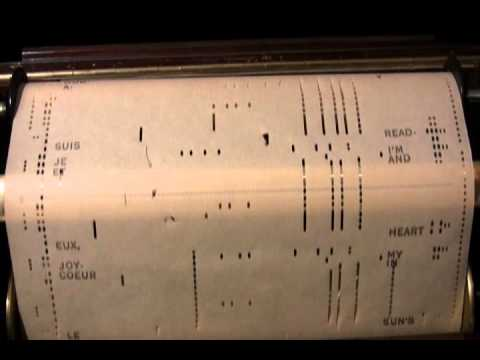

In [4]:
ipd.YouTubeVideo("ZXYslYDzF8o", width=900, height=600)

### MIDI

Musical Instrument Digital Interface.
- became popular in the 1980's as a way for controllers (keyboards) to communicate with synthesizers

<img src="images/midi_hookup.gif" width=650>

<img src="images/midi-cable.jpg" width=400>


MIDI is (by now) very old-school
- encodes messages for controlling synthesizers:
  - note on (including _velocity_)
  - note off
  - program change
  - pitch bend
  - volume, "mod wheel", etc...
- pretty low communication rate (by today's standards): 31kbs (k-bits per second). That's around 3-4 bytes per millisecond.

MIDI pitch numeric range:
- 0 (C-1) to 127 (G9)
- piano range is: A0 to C8 which is midi 21 to 108


### Midi File

SMF (Standard Midi File) encodes a bunch of MIDI messages with _timestamps_
- Tracks:
  - usually one track per channel (instrument)
  - conductor track storing "meta events" - tempo, key signature, time signature messages
- Timestamps are in "delta ticks" (not seconds), with a fixed _Ticks Per Quarter_ (TPQ).
- Convention is ".mid" or ".midi" files
- Open standard binary format
- Often edited with MIDI editing programs like:
  - Reaper
  - Logic
  - Cubase
  - Garage Band
  
<img src="images/midifile.png" width=400>


In [5]:
# an example of a MIDI file - beat/bar aligned with detailed tempo track
# (this works on my Mac. On other machines, view MIDI file through any DAW. Repear works and is free)
# import os
# os.system("open midi/bach_prelude_fugue_C.mid");

In [6]:
# full orchestral version of beethoven 5
# os.system("open midi/beeth5_orch.mid");

# Example he covered in class talked about "ticks per quarter" and gave
# an example of how to convert sheet music to MIDI.
# Noteworthy: the ticks are a delta from previous tick, so values are
# not absolute.

<font color='red'>__Whiteboard Example__</font>: Score to MIDI

Symbolic (MIDI) vs Score:
- MIDI is more explicit than the score.
- MIDI can capture some secondary markings, or ignore them.
- Score allows musician to perform with interpretation. Can describe "composer's intent".


## Audio

The main focus of this class is music in the audio domain - recorded music.

Music in audio format is in some sense very rich. All the notes, dynamics, phrasings, instruments, and subtle musical interpretation are captured.

But in some sense it is very poor. All "higher level meaning" is removed when going from sheet music to produced sounds.


### Sound Waves

<img src="images/tuning_fork.png" width = 600>

These sound pressure waves are captured by a microphone, converted into an electrical signal, and digitized into a computer.

### Digitization

Digitization happens on two axes:
- time: sampling rate
- value: quantization factor

<img src="images/digitization.png" width=600>

The _sampling rate_ (or _sampling frequency_) $F_s$ is how often we sample the audio signal: $F_s$ samples per second or $F_s$Hz (Hertz).

The _sampling period_ is $T = 1/F_s$.

The quantization factor is related to the bit-depth used to represent a single fixed-point number:
- In the example above, range is divided into 16 quanta from min-to-max, using 4 bits (1/2 a byte)
- Values are _signed_ using [two's-compliment](https://en.wikipedia.org/wiki/Two%27s_complement)

CD quality audio uses:
- 44,100 Hz (samples per second)
- 16 bits (65,536 values)

Telephone quality:
- 8,000 Hz
- 8 bits (256 values)

Let's record some audio produced and have a look:

In [7]:
# launch audacity
# os.system("open -a Audacity");

in Audacity:
- sample rate
- zooming into individual samples
- regularity of waveform
- Export as 16-bit WAV file

### Audio in python

Load audio into python variable

In [8]:
# [livecode]
x = fmp.load_wav('audio/clarinet.wav')

Play with `ipd.Audio`

In [9]:
# [livecode]
ipd.Audio(x, rate=44100, normalize=False)

Plot waveform
- note dynamic range: $ [-1, 1] $ as a floating point number
- plot subrange

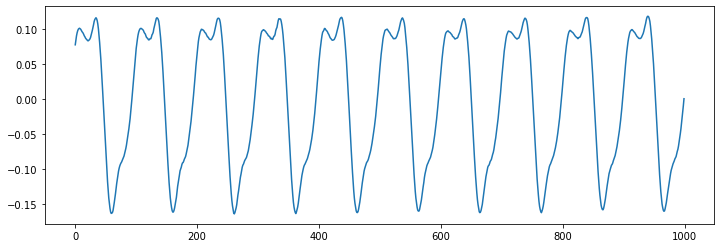

In [10]:
# [livecode]
n1 = 100000
plt.plot(x[n1:n1+1000])

Here is that Beethoven example, again, loaded into python:

In [11]:
# beethoven example
x = fmp.load_wav("audio/beeth5_orch_21bars.wav")

In [12]:
# [livecode]
fs = 44100
ipd.Audio(x, rate=fs)

How do we play just a portion? Say from time 3.4 seconds to 6.0 seconds?

In [13]:
# [livecode]
t1 = 3.4
t2 = 6.0

fs = 22050

# you multiply by the sampling rate, which is samples per second.
# unit for sampling rate is hertz, which is 1 / secs
n1 = int(t1 * fs)
n2 = int(t2 * fs)

ipd.Audio(x[n1:n2], rate=fs)

### Modeling a Simple Tone

In the example recorded tone, we saw _periodicity_ in the signal.

- Inspect period
- Compute frequency

In [14]:
# [livecode]

# if you take the number of samples and divide by sample rate,
# you get the number of seconds:

n = 101       # samples
fs = 44100    # sampling rate

# this is the time period:
wl = n / fs   # wavelength - in seconds

# to get the frequency, you divide 1 by time period:
freq = 1 / wl # frequency - in Hz

print(freq)

436.63366336633663


- Many physical sounding system can be modeled using a mass-spring system.
- This leads to _simple harmonic motion_ - in other words, __sine waves__:

<font color='red'>__Whiteboard Example__</font>: Sine waves 

*Joana: In the formula below sometimes you might see a $\sin(\omega t + \phi)$, where $\phi$ is the phase. But the phase doesn't matter too much in terms of sound.*

$x(t) = A \sin(\omega t)$  
where  
$\omega = 2 \pi f$ and $f$ is the frequency of oscillation in Hz.

In the digital domain, we sample $x(t)$ at a _sampling interval_ of $T$ or a _sampling rate_ of $F_s = 1/T$. 

$t = nT = n/F_s$ for $n \in \{0,1,2...\}$  

and so  

$x[n] = A \sin(\omega {n \over F_s} ) = A \sin(2 \pi f {n \over F_s} )$  

In [15]:
# [livecode]
fs = 44100 # sampling rate

# args: amplitude, frequency, duration, and sampling rate
x = fmp.make_sine_tone(.1, 432, 2, fs)
ipd.Audio(x, rate=fs, normalize=False)

#print(len(x))
#plt.plot(x[:1000])

### Pitch and Frequency

Perceived pitch is strongly related to this oscillation frequency.

Listen to what happens when we change the frequency _linearly_.

__Linear Frequency Steps__

In [16]:
fs = 44100

# frequencies are not linearly proportional to how we hear things
# we hear them in a logarithmic faction: adding 12 semitones is
# equal to multiplying by 2.
freqs = 220 * np.arange(1, 11)
print('Frequencies:\n', freqs)
x = fmp.make_tone_series(0.1, freqs, 0.5, fs)
ipd.Audio(x, rate=fs, normalize=False)

Frequencies:
 [ 220  440  660  880 1100 1320 1540 1760 1980 2200]


The relationship between pitch and frequency is logarithmic!
  - Moving up one octave equates to doubling the frequency
  - _Adding_ 12 semitones equates to _multiplying_ the frequency by 2.
  
Using MIDI pitch (where A440 = midi 69).

$F(p) = 2^{(p-69)/12} \cdot 440$

For example:
- $F(69) = 440$Hz
- $F(57) = 220$Hz
- $F(60) = 261.62$Hz

This formulation is known as the _equal tempered scale_.  
Raising one semitone equates to multiplying by $f_1 = 2^{1/12} \approx 1.05946$  
Raising by $n$ semitones equates to multiplying by $f_n = 2^{n/12}$

We can also divide the octave in _cents_: 100 divisions per semitone, or 1,200 divisions per octave.

__Multiplicative Frequency Steps__

In [17]:
# the amount you have to multiply a frequency by to get the next 
# semitone is 2^(1/12)

# [livecode]
# np.arange(0,13) -> going from 0 to 12.
freqs = 220 * 2**(np.arange(0, 13)/12)

In [18]:
print('Frequencies:\n', [f'{f:.2f}' for f in  freqs])
x = fmp.make_tone_series(0.1, freqs, 0.5, fs)
ipd.Audio(x, rate=fs, normalize=False)

Frequencies:
 ['220.00', '233.08', '246.94', '261.63', '277.18', '293.66', '311.13', '329.63', '349.23', '369.99', '392.00', '415.30', '440.00']


### Instrumental Sounds

*Joana: If you vibrate a string, it vibrates in multiple different modes. Each mode is a multiplier of the base mode.*

- Fundamental Frequency, $F_0$ (or first partial)
- Partials: set of sinusoidal vibrations of the instrument, in increasing order of frequency
- Harmonic sounds (strings, winds, brass instruments): partials are _integer multiples_ of the $F_0$, called _harmonics_.
- Inharmonic sounds (drums, bells): partials are not integer multiples of $F_0$

<img src="images/standingstring1.gif" width=600>

[source](http://resource.isvr.soton.ac.uk/spcg/tutorial/tutorial/StartCD.htm)


__Modeling Harmonic Instrumental Notes__

The first 10 modes of vibration:

In [19]:
f = 220
freqs = f * np.arange(1, 11)
x = fmp.make_tone_series(0.1, freqs, 0.5, fs)
ipd.Audio(x, rate=fs, normalize=False)

The same 10 modes, played simultaneously:

In [33]:
n = np.arange(1, 11)
freqs = f * n
print(freqs)

# Eran said you can also change the amplitudes of the sinewaves
#amps = np.ones(len(n))

# Joana-> Eran: if they decrease by 1/n you get a sawtooth wave
#amps = 1 / n

# Joana-> Eran: square wave
amps = 1 / n * (n % 2)

print('Amplitudes:\n', amps)
x = 0.05 * fmp.make_additive_tone(amps, freqs, 3, fs)
ipd.Audio(x, rate=fs, normalize=False)

[ 220  440  660  880 1100 1320 1540 1760 1980 2200]
Amplitudes:
 [1.         0.         0.33333333 0.         0.2        0.
 0.14285714 0.         0.11111111 0.        ]


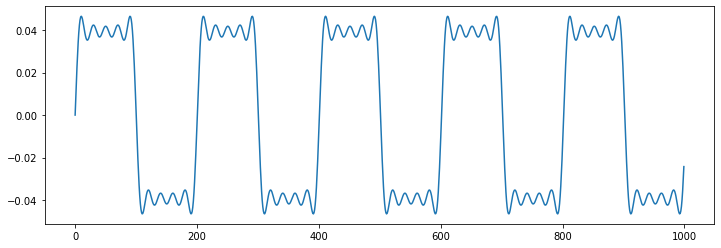

In [34]:
plt.plot(x[0:1000])
plt.show()

### Loudness

Similarly to pitch / frequency, we perceive _loudness_ as the logarithm of _sound intensity_

- $intensity = {power \over area} $
- threshold of hearing = $I_{TOH} = 10^{-12} {W \over m^2}$ 
- We often talk about _intensity level_ as a ratio in decibels (dB): $\text{dB}(I) = 10 \cdot \log_{10}({I \over I_{TOH}})$

<img src="images/loudness_table.png" width=600>

The ear's dynamic range is __HUGE__: 1 to 1,000,000,000,000

Two terms often used for loudness measure:
- Sound Intensity Level (SIL) is power per area
- Sound Pressure Level (SPL) is the change in air pressure

SPL is easy to measure: it's the output of the microphone - ie, the peaks of the waveform, or the _Amplitude_.

Intensity (SIL) is proportional to the _square_ of amplitude (SPL): $I \propto A^2$

$
\begin{align}
\text{dB}(I) & = 10 \log_{10}\left({ I \over I_0}\right) \\
\text{dB}(A) & = 10 \log_{10}\left({ A^2 \over A_0^2}\right) \\
             & = 20 \log_{10}\left({ A \over A_0}\right) \\
\end{align}
$

In other words, the above formulas show us the loudness of a sound in Decibels, based on measuring SIL or SPL. But in practice, we always measure SPL.


The decibel scale is used in audio engineering all the time.  
The rule of thumb is that "doubling the amplitude" increases the loudness by 6dB:

$20 \log_{10}(2.0) = 6.0206...$

<font color='red'>__Whiteboard Example__</font>: decibel scale


__Loudness example__

This generates a series of tones with different peak amplitudes

In [22]:
freqs = 440 * np.ones(10)
amps = np.linspace(.1, 1, 10)
print(amps)
x = fmp.make_tone_series(amps, freqs, 0.5, fs)
ipd.Audio(x, rate=fs, normalize=False)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [23]:
n = np.flip(np.arange(0,10))
print('n=%s' % n)
amps = 1 / 2**n
x = fmp.make_tone_series(amps, freqs, 0.5, fs)
print('amps=%s' % amps)
ipd.Audio(x, rate=fs, normalize=False)

n=[9 8 7 6 5 4 3 2 1 0]
amps=[0.00195312 0.00390625 0.0078125  0.015625   0.03125    0.0625
 0.125      0.25       0.5        1.        ]


### Timbre

Defining timbre is elusive. Sometimes we use an anti-definition:
Timbre is difference in two sounds that have the same pitch, loudness, and duration.

So, it is difficult to mathematically characterize this perceptual concept.

Some things we can say are:
- The time evolution of a note is interesting. We sometimes simplify into 4 phases: _Attack_, _Decay_, _Sustain_, _Release_
- The attack phase contains interesting "note startup" elements such as noise and non-harmonic components. This is sometimes called a _transient_.
- The higher partials of instruments often exhibit slight inharmonicities.
- The sustained portion of a sound can have evolution in energies of partials. 

<img src="images/adsr.png" width = 400>

<img src="images/adsr_piano_violin.png" width = 600>

In [24]:
ipd.Audio("audio/piano_c4.wav")

In [25]:
ipd.Audio("audio/violin_c4_legato.wav")